<a href="https://colab.research.google.com/github/lrsilsbee/Machine-Learning/blob/main/Lauren_Silsbee_beyond_a_b_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ess_combined_2012_2014.csv to ess_combined_2012_2014.csv


In [ ]:
import io
ess_df = pd.read_csv(io.StringIO(uploaded['ess_combined_2012_2014.csv'].decode('utf-8')))

In [ ]:
#Did people become less trusting from 2012 to 2014?
#Did people become happier from 2012 to 2014?
#Pick three or four of the countries in the sample and compare how often people met socially in 2014. 
  #Are there differences, and if so, which countries stand out?
#Pick three or four of the countries in the sample and compare how often people took part in social activities,
  # relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

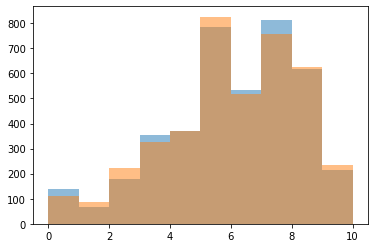

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)
(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)


In [ ]:
#Test for normality for ppltrst in both years.
#split into the two years (6 and 7 for 2012 and 2014)
ess2012 = ess_df[ess_df['year']==6]
ess2014 = ess_df[ess_df['year']==7]

plt.hist(ess2012['ppltrst'], alpha = .5)
plt.hist(ess2014['ppltrst'], alpha = .5)

plt.show()
#the distributions look close to normal
print(stats.describe(ess2012['ppltrst']))
print(stats.describe(ess2014['ppltrst']))

print(stats.shapiro(ess2012['ppltrst']))
print(stats.shapiro(ess2014['ppltrst']))

#the skew and kurtosis look normal. The W estimates look normal as well. 

In [ ]:
#Look at the difference between the two variables (trust in 2012 and trust 2014)
#Use a t test

print(stats.ttest_ind(ess2012['ppltrst'], ess2014['ppltrst']))

print('The p value is too high to reject the null. We cannot say that there was a statistically significant difference in trust between the years.')

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)
The p value is too high to reject the null. We cannot say that there was a statistically significant difference in trust between the years.


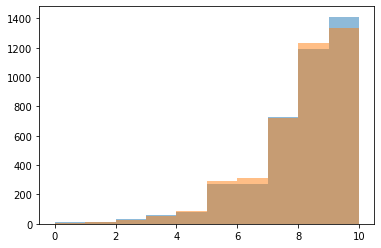

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)
(0.8943395018577576, 0.0)
(0.9060227870941162, 1.2611686178923354e-44)


KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

In [ ]:
#Did ppl become happier? 
#Use the same two dataframes, split into years
#Test for normality first

plt.hist(ess2012['happy'], alpha = .5)
plt.hist(ess2014['happy'], alpha = .5)

plt.show()
#the distributions look close to normal
print(stats.describe(ess2012['happy']))
print(stats.describe(ess2014['happy']))

print(stats.shapiro(ess2012['happy']))
print(stats.shapiro(ess2014['happy']))

#This does not seem to be normally distributed, so we cannot use a t-test 

stats.kruskal(ess2012['happy'], ess2014['happy'])
#The p value is supposed to be larger than .05 but it is right at .05. It is probably best to say we cannot reject the null

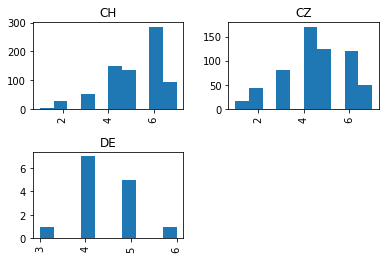

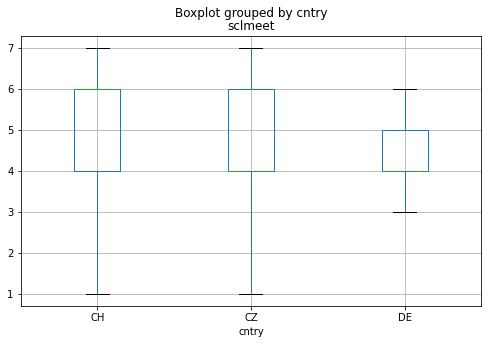

In [ ]:
#Pick three or four of the countries in the sample and compare how often people met socially in 2014.
#Are there differences, and if so, which countries stand out?

#Use the 2014 df and pick a few countries
ess2014['cntry'].unique()

#'CH', 'CZ', 'DE'
countries = ['CH', 'CZ', 'DE']
ess2014_countries = ess2014[ess2014['cntry'].isin(countries)]

ess2014_countries['sclmeet'].hist(by = ess2014_countries['cntry'])
#These certainly do not look normally distributed
#Since this is not normal, do Kruskal 

stats.kruskal(
    ess2014_countries.loc[ess2014_countries['cntry'] == 'CH',['sclmeet']],
    ess2014_countries.loc[ess2014_countries['cntry'] == 'CZ',['sclmeet']],
    ess2014_countries.loc[ess2014_countries['cntry'] == 'DE',['sclmeet']])

#The p value is really small and the t statistic is larger than the critical value. It looks like there is a significant difference in medians. 
#Can look at a box plot to identify which one 

ess2014_countries.boxplot('sclmeet', by='cntry', figsize=(8, 5))

#Looks like DE has a lower median

DescribeResult(nobs=1363, minmax=(1, 5), mean=2.7593543653705064, variance=0.7702409925415022, skewness=-0.07349771022541836, kurtosis=0.08852263600467003)


F_onewayResult(statistic=array([0.68053231]), pvalue=array([0.50651973]))

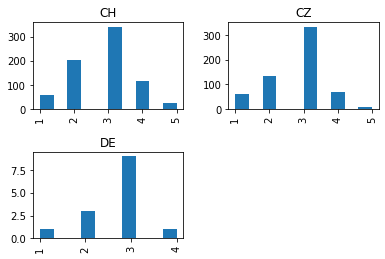

In [ ]:
#Question 4:
#Plot the variables
ess2014_countries['sclact'].hist(by = ess2014_countries['cntry'])

#run tests to see if they are normally distributed
print(stats.describe(ess2014_countries['sclact']))
#It looks normal enough, with low skew and kurtosis

#See if there is a statistically significant difference
#Since this is normal, we can do an ANOVA:

stats.f_oneway(
    ess2014_countries.loc[ess2014_countries['cntry'] == 'CH',['sclact']],
    ess2014_countries.loc[ess2014_countries['cntry'] == 'CZ',['sclact']],
    ess2014_countries.loc[ess2014_countries['cntry'] == 'DE',['sclact']])

#The p value is too high. There is not a significant difference.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rfft.csv to rfft.csv


In [ ]:
import io
rfft = pd.read_csv(io.StringIO(uploaded['rfft.csv'].decode('utf-8')))

DescribeResult(nobs=2515, minmax=(13.5, 161.5), mean=82.7079522862823, variance=808.8049884464099, skewness=0.020360395669875728, kurtosis=-0.5479245402887649)
DescribeResult(nobs=2515, minmax=(13.0, 155.0), mean=78.69244532803181, variance=707.0341513370058, skewness=0.1471876477093264, kurtosis=-0.5467621966747225)
(0.9922635555267334, 2.5078944476675247e-10)
(0.9909505248069763, 1.7879258837338874e-11)


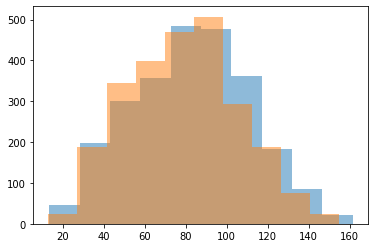

In [ ]:
rfft.head()
#Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

rfft_piv = rfft.pivot(index='Casenr', columns='Measurement', values='Unique')

plt.hist(rfft_piv['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfft_piv['Measurement 2 (2006-2008)'], alpha = .5)

#the distributions look close to normal
print(stats.describe(rfft_piv['Measurement 3 (2008-2012)']))
print(stats.describe(rfft_piv['Measurement 2 (2006-2008)']))

print(stats.shapiro(rfft_piv['Measurement 3 (2008-2012)']))
print(stats.shapiro(rfft_piv['Measurement 2 (2006-2008)']))
#Everything looks normal 

In [ ]:
#Use paired t test

stats.ttest_rel(rfft_piv['Measurement 3 (2008-2012)'], rfft_piv['Measurement 2 (2006-2008)'])
print("Yes, there is a significant difference.")

Yes, there is a significant difference.


DescribeResult(nobs=2515, minmax=(0.0, 124.0), mean=12.100198807157058, variance=187.75009940357853, skewness=3.03381078165085, kurtosis=13.347862924837408)
DescribeResult(nobs=2515, minmax=(0.0, 133.5), mean=11.769980119284295, variance=203.46626233055127, skewness=3.2001427277175862, kurtosis=13.913985994081123)
(0.7084382176399231, 0.0)
(0.6725998520851135, 0.0)


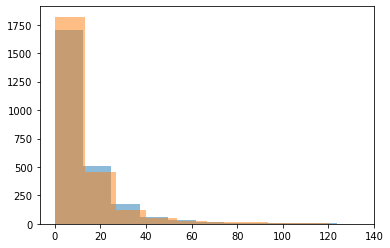

In [ ]:
#Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

#Use pivot again

rfft_errors = rfft.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfft_errors.head()

#Is it normal?
plt.hist(rfft_errors['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfft_errors['Measurement 2 (2006-2008)'], alpha = .5)

#does not look normal, is quite skewed, no bell surve
print(stats.describe(rfft_errors['Measurement 3 (2008-2012)']))
print(stats.describe(rfft_errors['Measurement 2 (2006-2008)']))

print(stats.shapiro(rfft_errors['Measurement 3 (2008-2012)']))
print(stats.shapiro(rfft_errors['Measurement 2 (2006-2008)']))
#kurtosis is high, skew is a little high 

In [ ]:
#cannot use paired t test since it doesn't look normal
stats.wilcoxon(rfft_errors['Measurement 3 (2008-2012)'], rfft_errors['Measurement 2 (2006-2008)'])
print("Test statistic greater than the critical value, p is small. There is a significant difference.")

Test statistic greater than the critical value, p is small. There is a significant difference.
